# Python

Python jest językiem programowania wysokiego poziomu, który w połączeniu z bibliotekami NumPy i SciPy do obliczeń naukowych pozwala na szybkie i wygodne programowanie lub analizowanie danych w sposób interaktywny. Przykłady prezentowane w ramach zajęć powinny uruchamiać się zarówno w wersji 2 jak i 3 języka Python, jednak zachęcamy Państwa, aby od początku uczyć się i korzystać z wersji 3 języka.

Szczególnie przydatne na analizie sygnałów będą moduły:

* numpy
* scipy
* matplotlib

Do reprezentowania sygnałów w programach będziemy stosować tablice numpy:

* ndarray

Jest to zarówno efektywne jeśli chodzi o pamięć jak i o szybkość wykonywania operacji matematycznych.

## Dokumentacja modułu scipy.signal

Proszę zapoznać się z dokumentacją biblioteki scipy.signal:

https://docs.scipy.org/doc/scipy/reference/

## Jupyter notebook
Na ćwiczeniach będziemy wykorzystywać narzędzie: jupyter notebook:

* http://jupyter.org

Pozwala ono na łączenie formatowanego tekstu i kodu dając w efekcie interaktywny skrypt.

# Przygotowanie notebooka do pracy: import bibliotek

Jeśli ktoś jeszcze używa pythona2 to powinien odpkomentować i wykonać poniższy kod:

In [ ]:
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

Ustawiamy bibliotekę matplotlib na wyświetlanie w oknie notebook'a:

In [ ]:
#%matplotlib notebook

Następnie importujemy biblioteki wykorzystywane w tym notebook'u:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sygnały ciągłe i dyskretne

---



## Podstawowe pojecia z Analizy Sygnałów

W tym ćwiczeniu zilustrujemy pojęcia:

* #### częstość próbkowania
* #### częstość Nyquista
* #### aliasing




* W komputerach nie mamy dostępu do sygnału ciągłego. 
* Wartości sygnału znane są tylko w dyskretnych momentach czasu. 
* Najczęściej stosujemy równe odstępy czasu $dt$
* Odwrotność tych okresów to częstość próbkowania $Fs = \frac{1}{dt}$
* Bardzo wygodnie jest myśleć o sygnałach jako o wektorach lub macierzach (rys. na tablicy)
* Do przechowywania sygnałów w pamięci używamy ndarray

### Zadanie: Próbkowanie
W poniższym ćwiczeniu chcemy zbadać efekt próbkowania sygnału w czasie. 

Czy próbkując sygnał z częstością $Fs = 100$ mogę odwzorować sygnał o  dowolnej częstości?

* wytwórz wektor t reprezentujący czas 1s próbkowany z częstością Fs

In [2]:
Fs =100
dt = 1/Fs
t = np.arange(0,1,dt)

* wytwórz sygnał  s, sinus o częstości f =10Hz. Dla przypomnienia wyrażenie: $ s(t) = \sin(2 \pi f t)$ możemy w pythonie zapisać:

In [3]:
f=10
s = np.sin(2*np.pi*f*t)

* wykreśl ten sygnał za pomocą punktów i linii

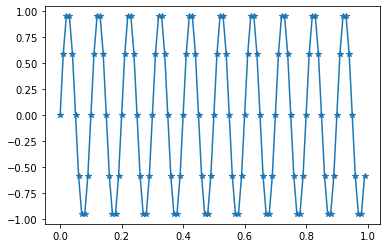

In [4]:
plt.figure()
plt.plot(t,s,'*-')
plt.show()

* wykreśl sygnały o częstościach 20, 40, 50, 90 Hz

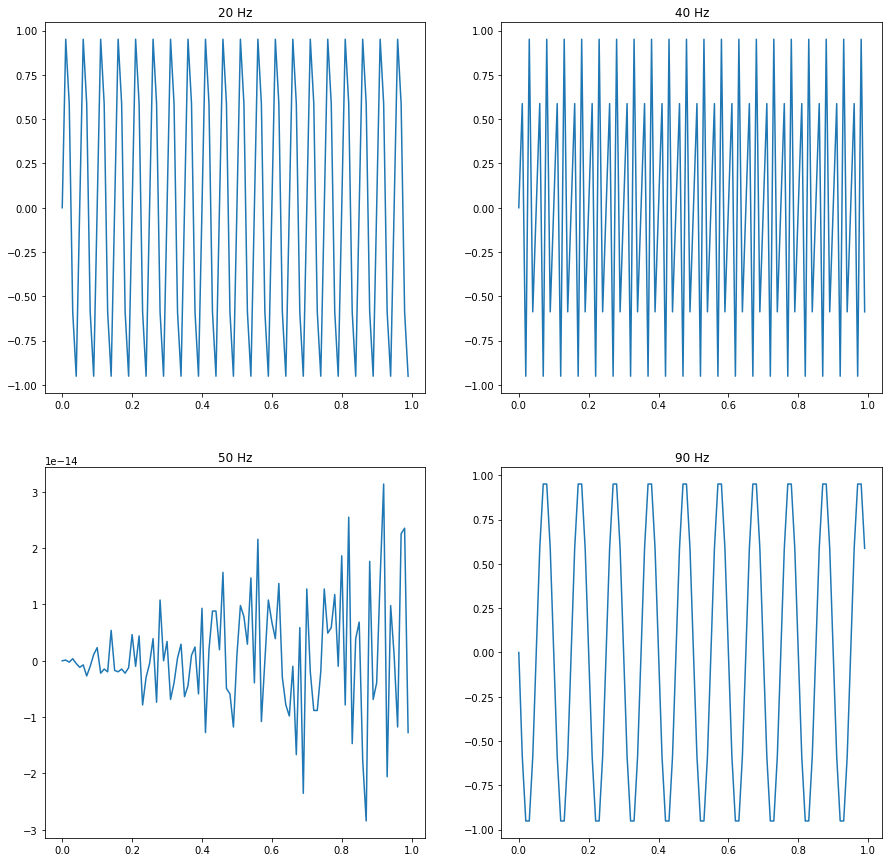

In [5]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
f1=20
s1 = np.sin(2*np.pi*f1*t)
plt.plot(t,s1)
plt.title('20 Hz')

plt.subplot(2,2,2)
f2=40
s2 = np.sin(2*np.pi*f2*t)
plt.plot(t,s2)
plt.title('40 Hz')

plt.subplot(2,2,3)
f3=50
s3 = np.sin(2*np.pi*f3*t)
plt.plot(t,s3)
plt.title('50 Hz')

plt.subplot(2,2,4)
f4=90
s4 = np.sin(2*np.pi*f4*t)
plt.plot(t,s4)
plt.title('90 Hz')

plt.show()

## Efekt aliasingu

Rzućmy okiem na przykład tego efektu:




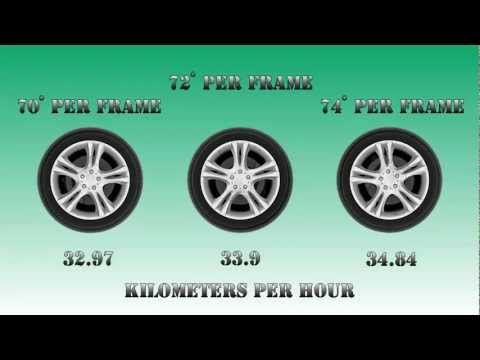

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("SFbINinFsxk")

* koła obracają się z pewną częstością zgodnie z kierunkiem ruchu wskazówek zegara;
* na filmie widać, że w pewnych kierunek ten się zmienia, mimo, że samochód wciąż jedzie w tą samą stronę;
* możemy przyjąć umownie, że obrotom zgodnie z kierunkiem wskazówek zegara przypiszemy wartości dodatnie, a obrotom w kierunku przeciwnym wartości ujemne.
* Dlaczego tak się dzieje?

Analogiczne zjawisko przeanalizujemy dla symulowanych sygnałów okresowych. Na nasze potrzeby wygenerujemy sygnały próbkowane z bardzo dużą częstością, które będą dla nas aproksymacją sygnałów ciągłych. Przy ich pomocy zaprezentujemy efekt utożsamiania (aliasingu).

Proszę wytworzyć wektor reprezentujący czas „prawie” ciągły. Będzie to u nas 1000 wartości z przedziału [0,1) wziętych z odstępem 0,001.

In [6]:
t = np.arange(0,1,0.001) # czas 'prawie ciągły'

Teraz proszę wygenerować dwie sinusoidy: jedną o częstości -1 a drugą o częstości 9.

In [7]:
f1 = -1 # częstość sygnału 1
f2 = 9 # częstość sygnału 2
s1 = np.sin(2*np.pi*f1*t) # prawie ciągły sygnał o częstości f1
s2 = np.sin(2*np.pi*f2*t) # prawie ciągły sygnał o częstości f2

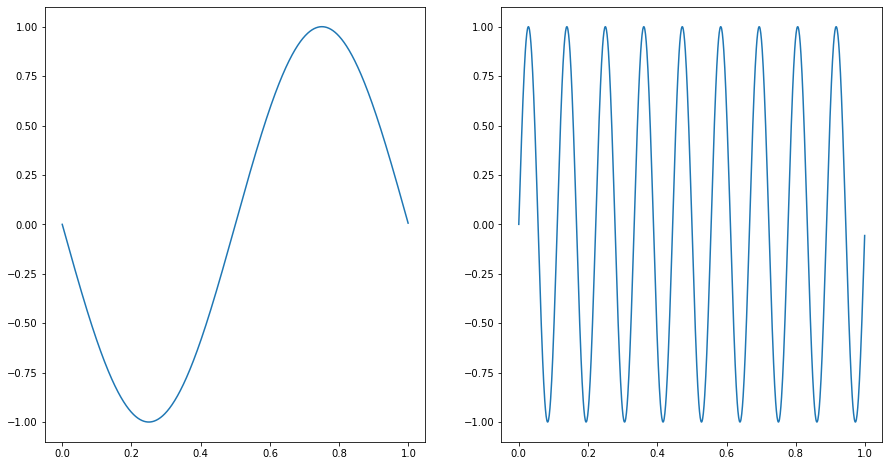

In [15]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(t,s1)

plt.subplot(1,2,2)
plt.plot(t,s2)

plt.show()

Proszę wykreślić obie sinusoidy.

Teraz proszę spróbkować czas i nasze „prawie” ciągłe sinusoidy z okresem próbkowania 0,1. (Trzeba pobrać co 100 element, proszę posłużyć się wycinkami)

In [8]:
T = 0.1 # okres próbkowania
Fs = 1/T # częstość próbkowania
FN = Fs/2 # częstość Nyquista
T_samp = t[0::100] # czas pobierania próbek
s1_samp = s1[0::100] # próbkowany sygnał o częstości f1
s2_samp = s2[0::100] # próbkowany sygnał o częstości f2

Na tle „prawie” ciągłych sinusoid proszę dorysować punkty ze spróbkowanych sygnałów. Aby punkty były dobrze widoczne proponuję użyć markerów x oraz +.

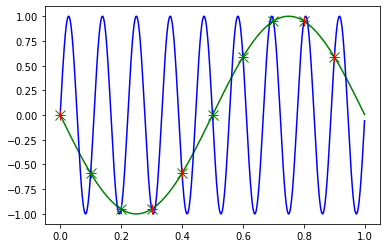

In [9]:
plt.figure()
plt.plot(t, s1, 'g')
plt.plot(t, s2, 'b')
plt.plot(T_samp, s1_samp, 'gx', markersize=10)
plt.plot(T_samp, s2_samp, 'r+', markersize=10)
plt.show()

* Proszę zaobserwować wzajemne położenie punktów.
* Czy można odróżnić sinusoidę o częstości −1 od sinusoidy o częstości 9, jeśli obie są próbkowane z częstością 10?
* Jak można uogólnić tą obserwację?

## Sygnały testowe

### Funkcja sinus
Sinus o zadanej częstości (w Hz), długości trwania, częstości próbkowania i fazie.
Poniższy kod implementuje i testuje funkcję:

## <center>$ \sin(f,T,Fs,\phi) = \sin(2*\pi f t)$ dla $t \in \{0,T\}$ </center>

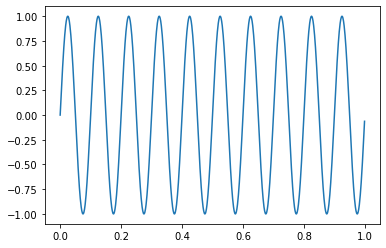

In [10]:
def sin(f = 1, T = 1, Fs = 128, phi =0 ):
	'''sin o zadanej częstości (w Hz), długości, fazie i częstości próbkowania
	Domyślnie wytwarzany jest sygnał reprezentujący 
	1 sekundę sinusa o częstości 1 Hz i zerowej fazie próbkowanego 128 Hz
	'''
 
	dt = 1.0/Fs
	t = np.arange(0,T,dt)
	s = np.sin(2*np.pi*f*t + phi)
	return (s,t)
 
 
(s,t) = sin(f=10,Fs=1000)
plt.plot(t,s)
plt.show()

### Funkcja Delta
Podobnie można zdefiniować funkcję delta o zadanym czasie trwania, częstości próbkowania i momencie wystąpienia impulsu:

## <center>$\delta(t_0) = \left\{^{1 \quad t=t_0} _{0 \quad t \ne t_0} \right.$</center>

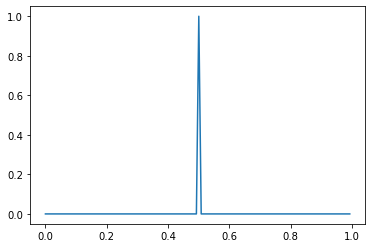

In [11]:
def delta(t0=0.5, T=1  ,Fs = 128):
    dt = 1.0/Fs
    t = np.arange(0,T,dt)
    d = np.zeros(len(t))
    idx = int(np.ceil(t0*Fs)) # indekx próbki gdzie chcemy mieć wstawioną deltę
    d[idx]=1
    return (t,d)
t,d = delta()
plt.plot(t,d)
plt.show()

### Zadanie 
Analogicznie do powyższych przykładów proszę zaimplementować i przetestować funkcje generujące:
* funkcję Gabora (funkcja Gaussa modulowana cosinusem) o zadanej częstości i standardowym odchyleniu w czasie, momencie wystąpienia, długości, częstości próbkowania i fazie. 
### <center>$g = \exp\left(-\frac{1}{2}\left(\frac{t-t_0}{\sigma}\right)^2 \right) \cdot  \cos(2 \pi f t + \phi); $</center>

* szum gaussowski o zadanej średniej, odchyleniu standardowym, długości i częstości próbkowania.

<!--* pochodną funkcji Gaussa

* połówkę funkcji Gaussa-->

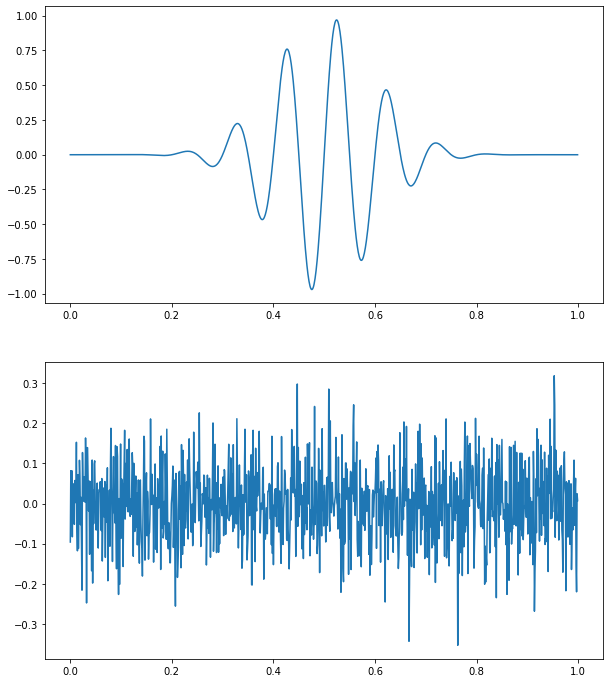

In [21]:
import random

def gabor(f=10, t0=0.5, sigma=0.1, T=1, Fs=128, phi=0):
    dt = 1.0/Fs
    t = np.arange(0,T,dt)
    g = np.exp(-0.5*((t-t0)/sigma)**2)*np.sin(2*np.pi*f*(t-t0) + phi)
    return (t,g)
    
def noise(sr=0, sigma=0.1, T=1, Fs=128):
    dt = 1.0/Fs
    t = np.arange(0,T,dt)
    n = np.zeros_like(t)
    for i in range(len(t)):
        n[i] = random.gauss(sr, sigma)
    return (t,n)

plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
(t,s) = gabor(f=10,Fs=1000,T=1)
plt.plot(t,s)
plt.subplot(2,1,2)
(t,s) = noise(T=1,Fs=1000)
plt.plot(t,s)
plt.show()

## Wczytywanie i zapisywanie sygnałów do pliku

#### Przypominamy:
* dtype http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html#arrays-dtypes-constructing
* open/close
* numpy.tofile
* numpy.fromfile

Poniższy kod ilustruje sposób zapisu dwóch funkcji sinus o częstościach 10 Hz i 21 Hz do pliku binarnego. 

* proszę uzupełnić go o ilustracje wykresami sygnału wygenergowanego i wczytanego.


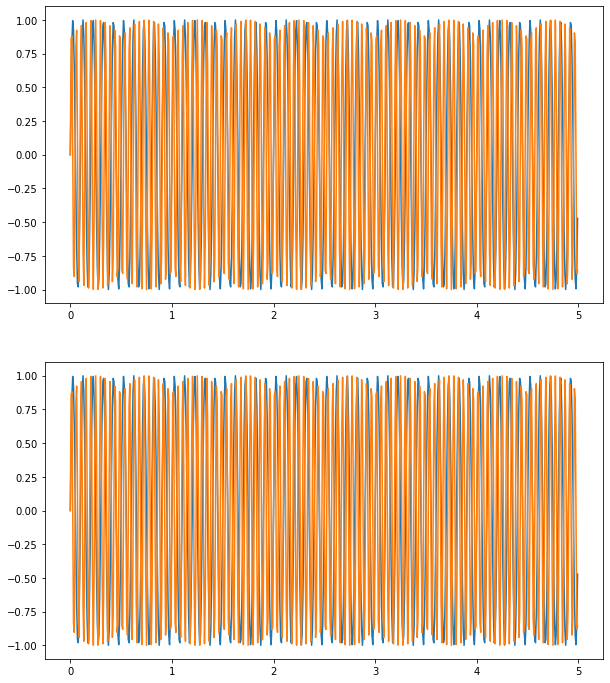

In [23]:
T = 5
Fs = 128

(s1,t) = sin(f=10, T=T, Fs=Fs)
(s2,t) = sin(f=21, T=T, Fs=Fs)

signal = np.zeros((T*Fs, 2), dtype='<f')
signal[:, 0] = s1
signal[:, 1] = s2

# zapis sygnału binarnego:
f_out = open('test_signal1.bin', 'wb') # otwieramy plik do pisania binarnego: 'wb'
signal.tofile(f_out) # zrzucamy zawartość tablicy ''signal'' do pliku identyfikowanego przez ''f_out''
f_out.close() # zamykamy plik
    
# czynność odwrotna - wczytanie sygnału binarnego
ch = 2 # liczba kanałów
fin = open('test_signal1.bin', 'rb') # otwieramy plik do czytania binarnego: 'rb'
s = np.fromfile(fin, dtype='<f') # tworzymy tablicę sig o typie określonym przez ''dtype''
                                 # wkładając do niej bity z pliku ''fin'' interpretowane zgodnie z ''dtype''
fin.close() # zamykamy plik
s = np.reshape(s,(len(s)//ch,ch)) # zmieniamy tablicę z jednowymiarowej na dwuwymiarową

plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.plot(t,signal)
plt.subplot(2,1,2)
plt.plot(t,s)
plt.show()

# SVAROG

Przydatnym narzędziem do analizy sygnałów, z którego będziemy korzystać na zajęciach, jest program SVAROG (pierwotnie skrót od Signal Viewer, Analyzer and Recorder On GPL). Program działa w środowisku Java, jest więc niezależny od systemu operacyjnego (Linux, Windows, OS X…). Svarog pozwala na wczytywanie i analizowanie sygnałów (nie tylko bioelektrycznych), zarówno przy użyciu prostych (FFT, spektrogram) jak i bardziej zaawansowanych (matching pursuit, ICA, DTF itd.) narzędzi. Dzięki współpracy z platformą OpenBCI, możliwa jest rejestracja sygnału (łącznie z metadanymi) bezpośrednio z poziomu graficznego interfejsu użytkownika.

## Svarog: uruchamianie i konfiguracja
Aktualną wersję programu Svarog można pobrać https://braintech.pl/software/svarog/ . Program nie wymaga instalacji. Po rozpakowaniu paczki do dowolnego katalogu należy uruchomić skrypt „run-svarog.sh” lub uruchomić bezpośrednio plik *.jar.


W przypadku pracy na własnych komputerach, do prawidłowego uruchomienia pluginu do analizy sygnałów, z którego będziemy korzystać w dalszej części ćwiczeń, konieczne jest zainstalowanie środowiska Oracle Java SE w wersji 8, które można pobrać [http://www.oracle.com/technetwork/java/javase/downloads/index.html ze strony wydawcy]. Alternatywnie, użytkownicy systemu Ubuntu lub pokrewnych dystrybucji mogą zainstalować środowisko Java według instrukcji [http://www.webupd8.org/2012/09/install-oracle-java-8-in-ubuntu-via-ppa.html dostępnych na tej stronie].


W ten sposób zapisany sygnał możemy wczytać w innym programie, na przykład Svarogu.

W celu wczytania zapisanego binarnie sygnału do programu Svarog, po wybraniu File -> Open signal, należy wprowadzić częstość próbkowania sygnału oraz liczbę kanałów.
<img src="img/800px-Svarog_open_signal.png">

### Zadanie: Nieznany typ danych
Posiadamy 3 kanałowy plik binarny z sygnałem EEG. Niestety zapomnieliśmy jaki jest typ zapisanych danych. Proszę wczytać plik i przy pomocy biblioteki matplotlib oraz grafik z fragmentami sygnałów odgadnąć, która z pośród wymienionych zmiennych dtype jest prawdziwa:
* 'float32'
* '>H'
* 'uint64'
* 'float64'

Plik binarny oraz grafiki można pobrać z <a href="https://drive.google.com/open?id=1WHNeEg29rSfXNQU63sVWTo8a6XF9oIqd"> stąd</a>

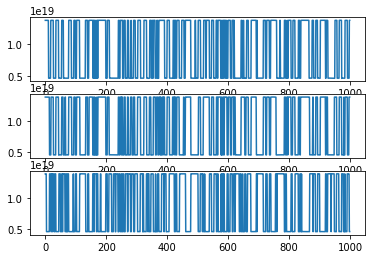

In [14]:
n_ch = 3
with open('3kanalowysygnal.bin', 'rb') as f_out:
    s = np.fromfile(f_out, dtype='uint64')
s_EEG = np.reshape(s,(len(s)//n_ch,n_ch))
plt.figure()
for ch in range(n_ch):
    plt.subplot(n_ch,1,ch+1)
    plt.plot(s_EEG[0:1000,ch])
plt.show()

    


### Zadanie: Nieznana liczba kanałów
Posiadamy n kanałowy plik binarny z sygnałem EKG, EEG i EMG, typ zmiennej to '<f'. Niestety zapomnieliśmy jaka jest liczba kanałów. Proszę wczytać plik i przy pomocy biblioteki matplotlib oraz grafik z fragmentami sygnałów odgadnąć liczbę kanałów. Plik binarny oraz grafiki można pobrać z <a href="https://drive.google.com/file/d/12tLSKz_jULYQUbEtqd6cTy4E6YRos4yq/view?usp=sharing"> stąd</a>

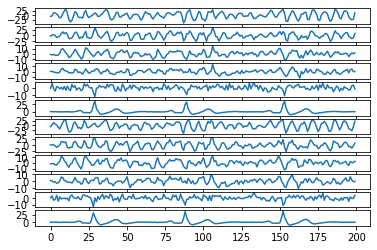

In [8]:
import numpy as np
import matplotlib.pyplot as plt

n_ch = 12
with open('nkanalowysygnal.bin', 'rb') as f_out:
    s = np.fromfile(f_out, dtype='<f')
s_mixed = np.reshape(s,(len(s)//n_ch,n_ch))
plt.figure()
for ch in range(n_ch):
    plt.subplot(n_ch,1,ch+1)
    plt.plot(s_mixed[0:200,ch])
plt.show()


### Zadanie:
Proszę stworzyć nową macierz z n+3 kanałami, zawierającą sygnały z dwóch poprzednich zadań. Następnie proszę zapisać macierz sygnałów do pliku binarnego i otworzyć w programie Svarog.

<IPython.core.display.Javascript object>


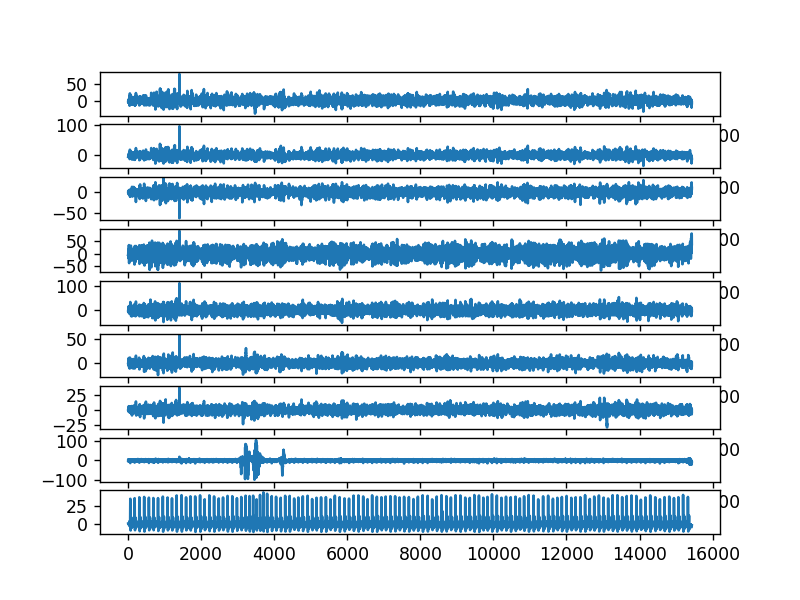

In [ ]:
n = s_EEG.shape[0]
n_ch = 9
signal = np.zeros((n, n_ch), dtype='<f')
signal[:, :3] = s_EEG
signal[:, 3:] = s_mixed
plt.figure()
for ch in range(n_ch):
    plt.subplot(n_ch,1,ch+1)
    plt.plot(signal[:,ch])
plt.show()

## Co należy z tego zapamiętać?
* czym są sygnały dyskretne - składają się z wartości w dyskretnych chwilach czasu
* jak tworzyć sygnały o konkretnej interpretacji fizycznej (częstość sygnału i częstość próbkowania)
* jak przechowuje się sygnały w pythonie (w tablicach numpy)
* jak zapisać sygnały do pliku i je wczytać z plików binarnych
* jak wykorzystywać SVAROGA do sprawdzania poprawności własnych rozwiązań

<b>Jeśli czegoś nie rozumiemy to należy dopytać, mailowo na (jarekz@fuw.edu.pl) lub w czasie zajęć</b>
